In [3]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modeling Helpers
from sklearn.cross_validation import train_test_split

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\Users\none5\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
housing_df = pd.read_csv('housing_train.csv')

In [5]:
#get an idea of what the data looks like
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Look for possible nulls and columns that are sparse
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#start making a cleaned up version of the data
housing_df_clean = housing_df.copy()

In [8]:
#drop all columns that have few values
del housing_df_clean['Alley']
del housing_df_clean['FireplaceQu']
del housing_df_clean['PoolQC']
del housing_df_clean['Fence']
del housing_df_clean['MiscFeature']

In [9]:
#make mapping for dummy categories
generic_equiv = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":-999}

In [10]:
#every column here is categorical and will be changed using one-hot encoding and then concatenated onto the original data
dummy_categories = []

dummy_categories.append('LotShape')
dummy_categories.append('MSZoning')
dummy_categories.append('Street')
dummy_categories.append('LandContour')
dummy_categories.append('Utilities')
dummy_categories.append('LotConfig')
dummy_categories.append('LandSlope')
dummy_categories.append('Neighborhood')
dummy_categories.append('Condition1')
dummy_categories.append('Condition2')
dummy_categories.append('BldgType')
dummy_categories.append('HouseStyle')
dummy_categories.append('RoofStyle')
dummy_categories.append('RoofMatl')
dummy_categories.append('Exterior1st')
dummy_categories.append('Exterior2nd')
dummy_categories.append('MasVnrType')
dummy_categories.append('Foundation')
dummy_categories.append('ExterQual')
dummy_categories.append('ExterCond')
dummy_categories.append('BsmtQual')
dummy_categories.append('BsmtCond')
dummy_categories.append('BsmtExposure')
dummy_categories.append('BsmtFinType1')
dummy_categories.append('BsmtFinType2')
dummy_categories.append('Heating')
dummy_categories.append('HeatingQC')
dummy_categories.append('CentralAir')
dummy_categories.append('Electrical')
dummy_categories.append('KitchenQual')
dummy_categories.append('Functional')
dummy_categories.append('GarageType')
dummy_categories.append('GarageFinish')
dummy_categories.append('GarageQual')
dummy_categories.append('GarageCond')
dummy_categories.append('PavedDrive')
dummy_categories.append('SaleType')
dummy_categories.append('SaleCondition')
       
extra_frames = []
for category in dummy_categories:    
    data = pd.get_dummies(prefix=category,data=housing_df_clean[category])
    frames = [housing_df_clean,data]
    housing_df_clean = pd.concat(frames,axis=1)
    del housing_df_clean[category]

In [11]:
#put SalePrice(our target variable) back at the end of the data
housing_df_clean['FinalPrice'] = housing_df_clean['SalePrice']
del housing_df_clean['SalePrice']
housing_df_clean['SalePrice'] = housing_df_clean['FinalPrice']
del housing_df_clean['FinalPrice']
housing_df_clean.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [12]:
#any remaining null values need to be replaced by zero
housing_df_clean = housing_df_clean.fillna(0)

In [13]:
housing_df_clean.isnull().any()

Id                       False
MSSubClass               False
LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea               False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt              False
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
                         ...  
GarageFinish_Unf         False
GarageQu

In [14]:
#check that there are no null values left
housing_df_clean.isnull().any().any()

False

In [15]:
#Look at the values that are highly correlated to SalePrice.  First experiment with choosing a subsection
#of only the highly correlated values to use for the model led to worse results. 
housing_corr = housing_df_clean.corr()
housing_corr['SalePrice'].sort_values(ascending=False)

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.472614
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF               0.324413
KitchenQual_Gd

In [16]:
#another experiment in the cell below using only the interquartile range (mid 50%) led to worse results 
housing_df_clean.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [17]:
# housing_df_clean = housing_df_clean[(housing_df_clean['SalePrice'] > housing_df_clean['SalePrice'].quantile(.05)) & (housing_df_clean['SalePrice'] < housing_df_clean['SalePrice'].quantile(.95)) ]

In [18]:
x = housing_df_clean.copy()
del x['SalePrice']
y = housing_df_clean['SalePrice']


In [19]:
#split my data, reserving 20 percent for testing purposes
validation_size = 0.2
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [20]:
#find the best alpha for Ridge regression the hard way
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
alphas = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for alpha in alphas:    
    ridge_cv = Ridge(alpha)
    scores = cross_val_score(ridge_cv, x, y, cv=10)
    print("Alpha = " + str(alpha) + "\n" +"Score = "+ str(scores.mean()) + "\n")

Alpha = 0.0001
Score = 0.819247509145

Alpha = 0.001
Score = 0.81938958526

Alpha = 0.01
Score = 0.820730144195

Alpha = 0.1
Score = 0.829472188269

Alpha = 1
Score = 0.844120054894

Alpha = 10
Score = 0.849575634947

Alpha = 100
Score = 0.84297983176

Alpha = 1000
Score = 0.805977602578

Alpha = 10000
Score = 0.755247446872



In [21]:
#find the best alpha for Ridge regression the easy way
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
reg.fit(x,y)       


print "Best alpha choice is: " + str(reg.alpha_)

Best alpha choice is: 10.0


In [22]:
#actual score using the parameters found above
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10).fit(x_train,y_train)
print("training set score: %f" % ridge.score(x_train, y_train))
print("test set score: %f" % ridge.score(x_test, y_test))

training set score: 0.896557
test set score: 0.880309


In [23]:
#experiment with ElasticNet, which is another form of regression that uses an alpha and an L1 ratio.  This led to worse results.
reg = linear_model.ElasticNetCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
reg.fit(x,y)       


print "Best alpha choice is: " + str(reg.alpha_)
print "Best l1_ratio choice is: " + str(reg.l1_ratio_)

C:\Users\none5\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best alpha choice is: 100.0
Best l1_ratio choice is: 1.0


In [24]:
elastic = linear_model.ElasticNet(alpha=100,l1_ratio=1).fit(x_train,y_train)
print("training set score: %f" % elastic.score(x_train, y_train))
print("test set score: %f" % elastic.score(x_test, y_test))

training set score: 0.923941
test set score: 0.874030


In [25]:
y_test.count()

292

In [26]:
#double check on regressor choice using additional metrics
y_pred = ridge.predict(x_test)
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


print("mean_absolute_error: %f" % mean_absolute_error(y_test, y_pred))
print("median_absolute_error: %f" % median_absolute_error(y_test, y_pred))
print("r2_score: %f" % r2_score(y_test, y_pred))

mean_absolute_error: 19004.860143
median_absolute_error: 14543.804250
r2_score: 0.880309


In [27]:
y_pred = elastic.predict(x_test)

print("mean_absolute_error: %f" % mean_absolute_error(y_test, y_pred))
print("median_absolute_error: %f" % median_absolute_error(y_test, y_pred))
print("r2_score: %f" % r2_score(y_test, y_pred))

mean_absolute_error: 17402.341349
median_absolute_error: 10993.943783
r2_score: 0.874030


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [29]:
y_pred = dt_regressor.predict(x_test)

from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("mean_absolute_error: %f" % mean_absolute_error(y_test, y_pred))
print("median_absolute_error: %f" % median_absolute_error(y_test, y_pred))
print("r2_score: %f" % r2_score(y_test, y_pred))

mean_absolute_error: 26745.085616
median_absolute_error: 17850.000000
r2_score: 0.778047


In [30]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=400,random_state=7)
ab_regressor.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [32]:
y_pred = ab_regressor.predict(x_test)

from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("mean_absolute_error: %f" % mean_absolute_error(y_test, y_pred))
print("median_absolute_error: %f" % median_absolute_error(y_test, y_pred))
print("r2_score: %f" % r2_score(y_test, y_pred))

mean_absolute_error: 16566.664384
median_absolute_error: 10500.000000
r2_score: 0.908953


In [176]:
#side by side comparison to verify score results above

results = {}
for i in range(0,292): 
    line=[]
    elastic_win_count = 0
    ridge_win_count = 0
    ada_win_count = 0
    predicted_value_ridge = ridge.predict(x_test)[i]
    predicted_value_elastic = elastic.predict(x_test)[i]
    predicted_value_ada = ab_regressor.predict(x_test)[i]
    actual_value = y_test.iloc[i]
    percent_difference_ridge = abs(100 * ((predicted_value_ridge - actual_value)/predicted_value_ridge))
    percent_difference_elastic = abs(100 * ((predicted_value_elastic - actual_value)/predicted_value_elastic))
    percent_difference_ada = abs(100 * ((predicted_value_ada - actual_value)/predicted_value_ada))
    
    winner = [percent_difference_ridge,percent_difference_elastic,percent_difference_ada]
    winner = winner.index(min(winner))
    
    if winner == 0:
        ridge_win_count += 1
    elif winner == 1:
        elastic_win_count += 1
    else:
        ada_win_count += 1
    
    line=[actual_value,predicted_value_ridge,predicted_value_elastic,predicted_value_ada,percent_difference_ridge,percent_difference_elastic,
          percent_difference_ada,elastic_win_count,ridge_win_count,ada_win_count,winner]
    
    results[i]=line
    
    

In [177]:
column_names = ['actual_value','predicted_value_ridge','predicted_value_elastic','predicted_value_ada',
                'percent_difference_ridge','percent_difference_elastic','percent_difference_ada','elastic_win_count',
                'ridge_win_count','ada_win_count','winner']
results_df = pd.DataFrame(results)
results_df = results_df.T
results_df.columns = column_names

results_df.head(10)

,actual_value,predicted_value_ridge,predicted_value_elastic,predicted_value_ada,percent_difference_ridge,percent_difference_elastic,percent_difference_ada,elastic_win_count,ridge_win_count,ada_win_count,winner
0,152000.0,161217.246091,154813.799151,147000.0,5.717283,1.817538,3.401361,1.0,0.0,0.0,1.0
1,189000.0,204023.944795,201976.535563,194500.0,7.363814,6.424774,2.827763,0.0,0.0,1.0,2.0
2,172785.0,179176.305237,183064.422202,173900.0,3.567048,5.615194,0.641173,0.0,0.0,1.0,2.0
3,60000.0,93082.745953,92804.866146,125000.0,35.541223,35.348218,52.000000,1.0,0.0,0.0,1.0
4,123000.0,136910.186227,139217.540745,132250.0,10.160081,11.649064,6.994329,0.0,0.0,1.0,2.0
5,318000.0,336575.926697,331947.030988,284000.0,5.519090,4.201583,11.971831,1.0,0.0,0.0,1.0
6,142500.0,146012.490864,144064.930081,154000.0,2.405610,1.086267,7.467532,1.0,0.0,0.0,1.0
7,124000.0,131411.860928,124816.129817,118400.0,5.640177,0.653866,4.729730,1.0,0.0,0.0,1.0
8,137000.0,132521.365630,144266.482355,144000.0,3.379556,5.036847,4.861111,0.0,1.0,0.0,0.0
9,129500.0,112557.735539,110498.318230,123000.0,15.052066,17.196354,5.284553,0.0,0.0,1.0,2.0


In [178]:
winner = { 0 : 'Ridge', 1 : 'Elastic', 2 : 'Ada'}
results_df['winner'] = results_df['winner'].map(winner)
results_df.head(20)

,actual_value,predicted_value_ridge,predicted_value_elastic,predicted_value_ada,percent_difference_ridge,percent_difference_elastic,percent_difference_ada,elastic_win_count,ridge_win_count,ada_win_count,winner
0,152000.0,161217.246091,154813.799151,147000.0,5.717283,1.817538,3.401361,1.0,0.0,0.0,Elastic
1,189000.0,204023.944795,201976.535563,194500.0,7.363814,6.424774,2.827763,0.0,0.0,1.0,Ada
2,172785.0,179176.305237,183064.422202,173900.0,3.567048,5.615194,0.641173,0.0,0.0,1.0,Ada
3,60000.0,93082.745953,92804.866146,125000.0,35.541223,35.348218,52.000000,1.0,0.0,0.0,Elastic
4,123000.0,136910.186227,139217.540745,132250.0,10.160081,11.649064,6.994329,0.0,0.0,1.0,Ada
5,318000.0,336575.926697,331947.030988,284000.0,5.519090,4.201583,11.971831,1.0,0.0,0.0,Elastic
6,142500.0,146012.490864,144064.930081,154000.0,2.405610,1.086267,7.467532,1.0,0.0,0.0,Elastic
7,124000.0,131411.860928,124816.129817,118400.0,5.640177,0.653866,4.729730,1.0,0.0,0.0,Elastic
8,137000.0,132521.365630,144266.482355,144000.0,3.379556,5.036847,4.861111,0.0,1.0,0.0,Ridge
9,129500.0,112557.735539,110498.318230,123000.0,15.052066,17.196354,5.284553,0.0,0.0,1.0,Ada


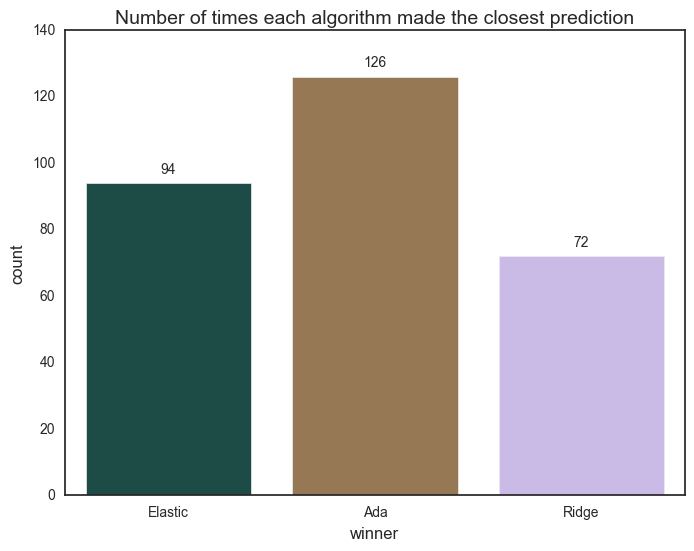

In [179]:
from matplotlib.pyplot import show

f = lambda x: str(x)[:str(x).find('.')]

ax = sns.countplot(x="winner", data=results_df,palette="cubehelix")
ax.axes.set_title('Number of times each algorithm made the closest prediction', fontsize=14)
total = float(len(results_df)) # one person per row 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{}'.format(f(height)),
            ha="center") 
show()

In [180]:
#a look at the predicted values and actual values
from __future__ import division

for i in range(1,292,2): 
    predicted_value = ab_regressor.predict(x_test)[i]
    actual_value = y_test.iloc[i]
    percent_difference = (predicted_value - actual_value)/predicted_value
    
    print("predicted: " + str(predicted_value))
    print("actual: " + str(actual_value))
    print("difference: " + str( predicted_value - actual_value ) )
    print("percent difference: " + str(abs(percent_difference * 100)))
    print("\n")

predicted: 194500.0
actual: 189000
difference: 5500.0
percent difference: 2.82776349614


predicted: 125000.0
actual: 60000
difference: 65000.0
percent difference: 52.0


predicted: 284000.0
actual: 318000
difference: -34000.0
percent difference: 11.9718309859


predicted: 118400.0
actual: 124000
difference: -5600.0
percent difference: 4.72972972973


predicted: 123000.0
actual: 129500
difference: -6500.0
percent difference: 5.28455284553


predicted: 173733.0
actual: 177500
difference: -3767.0
percent difference: 2.16826970121


predicted: 179665.0
actual: 155835
difference: 23830.0
percent difference: 13.2635738736


predicted: 179000.0
actual: 178000
difference: 1000.0
percent difference: 0.558659217877


predicted: 165500.0
actual: 152000
difference: 13500.0
percent difference: 8.15709969789


predicted: 180000.0
actual: 170000
difference: 10000.0
percent difference: 5.55555555556


predicted: 149000.0
actual: 148000
difference: 1000.0
percent difference: 0.671140939597


predicted

In [37]:
len(ab_regressor.feature_importances_)

271

In [39]:
x.columns

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1',
       ...
       u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=271)

In [46]:
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))
    index_sorted = index_sorted[:7]

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

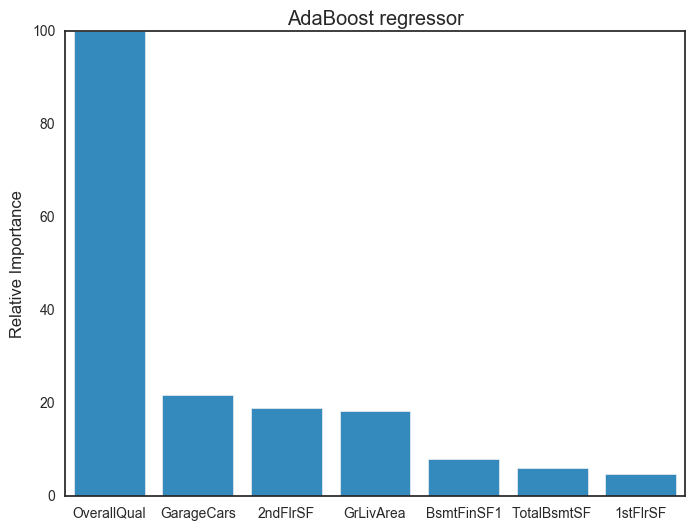

In [47]:
#This plot agrees with the correlation data from earlier as far as what is the most important feature (OverallQual).  However,
#it has also highlighted a precise subset of the remaining most valuable features. It might be worth investigating a regression 
#based on just these features if speed was an issue.

plot_feature_importances(ab_regressor.feature_importances_,
            'AdaBoost regressor', x.columns)